### A few initial libraries ###

In [1]:
import numpy as np
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile

from qiskit.transpiler import PassManager

from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_histogram
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor

from qiskit import IBMQ
from qiskit.test.mock import FakeManhattan
from qiskit.test.mock import FakeBogota
from qiskit.test.mock import FakeMumbai
from qiskit.test.mock import FakeTokyo
# The pulse simulator
from qiskit.providers.aer import PulseSimulator

# Object for representing physical models
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import NoiseModel

from gate_variants.toffoli_variants import CCX_Variant_Gate 
from orientation_map import orientation_map_gen

from backends.backend_connectivity import cluster, couplingmap_to_graph, orientation_from_coupling

from trios_bench.cnx_dirty import generate_dirty_multicontrol
from trios_bench.cnx_halfdirty import generate_cnx_halfdirty
from trios_bench.cnx_logdepth import generate_cnx_log_depth
from trios_bench.cnx_inplace import generate_cnx_inplace
from trios_bench.cuccaro_adder import generate_cuccaro_adder
from trios_bench.Takahashi_adder import generate_takahashi_adder
from trios_bench.incrementer_borrowedbit import generate_incrementer
from trios_bench.grovers_integer_search import generate_grover_integer_search_circuit

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
def cluster(k_inner, k_outer):
    coupling_map = []
    qid = 0
    for i in range(0, k_inner):
        for j in range(0, k_outer):
            qid = k_outer * i + j
            for j2 in range(0, k_outer):
                if j != j2:
                    coupling_map.append([qid, k_outer * i + j2])
                
        for i2 in range(0, k_inner):
            if i != i2:
                coupling_map.append([i*k_outer, i2*k_outer])

    return coupling_map

In [4]:
coupling_map = cluster(4, 5)

In [5]:
coupling_map

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [1, 0],
 [1, 2],
 [1, 3],
 [1, 4],
 [2, 0],
 [2, 1],
 [2, 3],
 [2, 4],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 4],
 [4, 0],
 [4, 1],
 [4, 2],
 [4, 3],
 [0, 5],
 [0, 10],
 [0, 15],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [6, 5],
 [6, 7],
 [6, 8],
 [6, 9],
 [7, 5],
 [7, 6],
 [7, 8],
 [7, 9],
 [8, 5],
 [8, 6],
 [8, 7],
 [8, 9],
 [9, 5],
 [9, 6],
 [9, 7],
 [9, 8],
 [5, 0],
 [5, 10],
 [5, 15],
 [10, 11],
 [10, 12],
 [10, 13],
 [10, 14],
 [11, 10],
 [11, 12],
 [11, 13],
 [11, 14],
 [12, 10],
 [12, 11],
 [12, 13],
 [12, 14],
 [13, 10],
 [13, 11],
 [13, 12],
 [13, 14],
 [14, 10],
 [14, 11],
 [14, 12],
 [14, 13],
 [10, 0],
 [10, 5],
 [10, 15],
 [15, 16],
 [15, 17],
 [15, 18],
 [15, 19],
 [16, 15],
 [16, 17],
 [16, 18],
 [16, 19],
 [17, 15],
 [17, 16],
 [17, 18],
 [17, 19],
 [18, 15],
 [18, 16],
 [18, 17],
 [18, 19],
 [19, 15],
 [19, 16],
 [19, 17],
 [19, 18],
 [15, 0],
 [15, 5],
 [15, 10]]

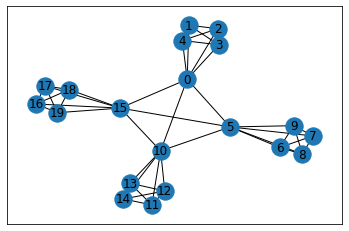

In [6]:
couplingmap_to_graph(coupling_map, Draw=True)

In [7]:
orientation_map = orientation_from_coupling(coupling_map)

In [8]:
orientation_map

{(0, 1): 'b',
 (0, 2): 'b',
 (0, 3): 'b',
 (0, 4): 'b',
 (1, 0): 'f',
 (1, 2): 'b',
 (1, 3): 'b',
 (1, 4): 'b',
 (2, 0): 'f',
 (2, 1): 'f',
 (2, 3): 'b',
 (2, 4): 'b',
 (3, 0): 'f',
 (3, 1): 'f',
 (3, 2): 'f',
 (3, 4): 'b',
 (4, 0): 'f',
 (4, 1): 'f',
 (4, 2): 'f',
 (4, 3): 'f',
 (0, 5): 'b',
 (0, 10): 'b',
 (0, 15): 'b',
 (5, 6): 'b',
 (5, 7): 'b',
 (5, 8): 'b',
 (5, 9): 'b',
 (6, 5): 'f',
 (6, 7): 'b',
 (6, 8): 'b',
 (6, 9): 'b',
 (7, 5): 'f',
 (7, 6): 'f',
 (7, 8): 'b',
 (7, 9): 'b',
 (8, 5): 'f',
 (8, 6): 'f',
 (8, 7): 'f',
 (8, 9): 'b',
 (9, 5): 'f',
 (9, 6): 'f',
 (9, 7): 'f',
 (9, 8): 'f',
 (5, 0): 'f',
 (5, 10): 'b',
 (5, 15): 'b',
 (10, 11): 'b',
 (10, 12): 'b',
 (10, 13): 'b',
 (10, 14): 'b',
 (11, 10): 'f',
 (11, 12): 'b',
 (11, 13): 'b',
 (11, 14): 'b',
 (12, 10): 'f',
 (12, 11): 'f',
 (12, 13): 'b',
 (12, 14): 'b',
 (13, 10): 'f',
 (13, 11): 'f',
 (13, 12): 'f',
 (13, 14): 'b',
 (14, 10): 'f',
 (14, 11): 'f',
 (14, 12): 'f',
 (14, 13): 'f',
 (10, 0): 'f',
 (10, 5): 'f',
 (

### Load device and the device configuration object ###

In [9]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q-ornl')
# device = FakeMumbai()

# backend_prop = device.properties()

In [10]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider

In [11]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [12]:
from level3_context import _parse_transpile_args, level_3_context_pass_manager
from level3_context_pulse import level_3_pass_manager, level_3_orign_pulse_pass_manager, level_3_context_pulse_pass_manager, level_3_pulse_pass_manager

In [13]:
qc0 = generate_dirty_multicontrol(6, 11)
qc1 = generate_cnx_halfdirty(19)
qc2 = generate_cnx_log_depth(19)
qc3 = generate_cnx_inplace(4)
qc4 = generate_cuccaro_adder(20)
qc5 = generate_takahashi_adder(20)
qc6 = generate_incrementer(5)
qc7 = generate_grover_integer_search_circuit(6, 3, 0, maxn=None, num_rounds=None)
qc_list = [qc0, qc1, qc2, qc3, qc4, qc5,qc6, qc7]

In [14]:
backend = provider.get_backend('ibmq_montreal')

In [15]:
backend_monitor(backend)

ibmq_montreal
Configuration
-------------
    n_qubits: 27
    operational: True
    status_msg: active
    pending_jobs: 3
    backend_version: 1.11.13
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    live_data: False
    quantum_volume: 128
    n_uchannels: 56
    meas_kernels: ['hw_qmfk']
    conditional_latency: []
    description: 27 qubit device
    hamiltonian: {'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of transformations:\n\n$(\\mathbb{I}-\\sigma_{i}^z)/2 \\rightarrow O_i \\equiv b^\\dagger_{i} b_{i}$,\n\n$\\sigma_{+} \\rightarrow b^\\dagger$,\n\n$\\sigma_{-} \\rightarrow b$,\n\n$\\sigma_{i}^X \\rightarrow b^\\dagger_{i} + b_{i}$.\n\nQubits are coupled through resonator buses. The provided Hamiltonian has been projected into the zero excitation subspace of the resonator buse

Qubits [Name / Freq / T1 / T2 / RZ err / SX err / X err / Readout err]
----------------------------------------------------------------------
    Q0 / 4.91108 GHz / 118.62378 us / 112.38580 us / 0.00000 / 0.00020 / 0.00020 / 0.01130 
    Q1 / 4.83494 GHz / 176.48535 us / 41.31502 us / 0.00000 / 0.00016 / 0.00016 / 0.01770 
    Q2 / 4.98254 GHz / 101.82467 us / 116.05319 us / 0.00000 / 0.00027 / 0.00027 / 0.01810 
    Q3 / 5.10540 GHz / 87.74085 us / 36.13279 us / 0.00000 / 0.00025 / 0.00025 / 0.01300 
    Q4 / 5.00395 GHz / 134.12701 us / 158.19922 us / 0.00000 / 0.00031 / 0.00031 / 0.01550 
    Q5 / 5.03285 GHz / 141.89919 us / 104.93608 us / 0.00000 / 0.00116 / 0.00116 / 0.01480 
    Q6 / 4.95092 GHz / 125.92458 us / 28.61926 us / 0.00000 / 0.00035 / 0.00035 / 0.10490 
    Q7 / 4.90233 GHz / 150.85514 us / 144.27477 us / 0.00000 / 0.00029 / 0.00029 / 0.08530 
    Q8 / 4.90803 GHz / 167.44511 us / 100.56268 us / 0.00000 / 0.00028 / 0.00028 / 0.02540 
    Q9 / 5.04472 GHz / 76.32407 us

In [16]:
backend_prop = backend.properties()

In [17]:
#orientation_map = orientation_map_gen(backend)

In [18]:
#coupling_map = [[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]

In [19]:
transpile_args = _parse_transpile_args(qc_list, backend = None, coupling_map = coupling_map, basis_gates = ['cx', 'rz', 'sx', 'x', 'acecr_pm'], seed_transpiler = 0, orientation_map = orientation_map)

In [20]:
pass_manager_config = transpile_args[0]['pass_manager_config']

In [21]:
print(pass_manager_config.orientation_map)

{(0, 1): 'b', (0, 2): 'b', (0, 3): 'b', (0, 4): 'b', (1, 0): 'f', (1, 2): 'b', (1, 3): 'b', (1, 4): 'b', (2, 0): 'f', (2, 1): 'f', (2, 3): 'b', (2, 4): 'b', (3, 0): 'f', (3, 1): 'f', (3, 2): 'f', (3, 4): 'b', (4, 0): 'f', (4, 1): 'f', (4, 2): 'f', (4, 3): 'f', (0, 5): 'b', (0, 10): 'b', (0, 15): 'b', (5, 6): 'b', (5, 7): 'b', (5, 8): 'b', (5, 9): 'b', (6, 5): 'f', (6, 7): 'b', (6, 8): 'b', (6, 9): 'b', (7, 5): 'f', (7, 6): 'f', (7, 8): 'b', (7, 9): 'b', (8, 5): 'f', (8, 6): 'f', (8, 7): 'f', (8, 9): 'b', (9, 5): 'f', (9, 6): 'f', (9, 7): 'f', (9, 8): 'f', (5, 0): 'f', (5, 10): 'b', (5, 15): 'b', (10, 11): 'b', (10, 12): 'b', (10, 13): 'b', (10, 14): 'b', (11, 10): 'f', (11, 12): 'b', (11, 13): 'b', (11, 14): 'b', (12, 10): 'f', (12, 11): 'f', (12, 13): 'b', (12, 14): 'b', (13, 10): 'f', (13, 11): 'f', (13, 12): 'f', (13, 14): 'b', (14, 10): 'f', (14, 11): 'f', (14, 12): 'f', (14, 13): 'f', (10, 0): 'f', (10, 5): 'f', (10, 15): 'b', (15, 16): 'b', (15, 17): 'b', (15, 18): 'b', (15, 19):

In [22]:
def generate_results(qc, pass_config):
    pm_orign = level_3_pass_manager(pass_manager_config)
    pm_orign_pulse = level_3_orign_pulse_pass_manager(pass_manager_config)
    pm_context = level_3_context_pass_manager(pass_manager_config)
    pm_context_pulse = level_3_context_pulse_pass_manager(pass_manager_config)
    qc_orign = pm_orign.run(qc)
    qc_orign_pulse = pm_orign_pulse.run(qc)
    qc_context = pm_context.run(qc)
    qc_context_pulse = pm_context_pulse.run(qc)
    return [qc_orign, qc_orign_pulse, qc_context, qc_context_pulse]

In [23]:
qc8 = generate_grover_integer_search_circuit(4, 2, 0, maxn=None, num_rounds=None)

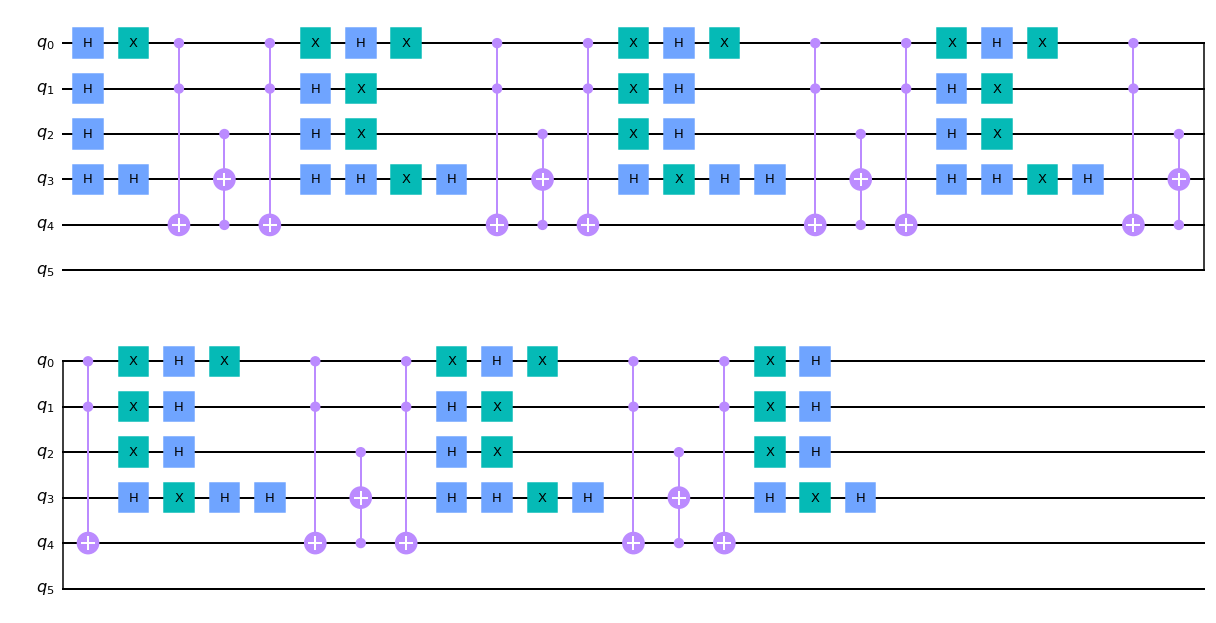

In [24]:
qc8.draw(output='mpl')

In [25]:
result = generate_results(qc8, pass_manager_config)

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  2 4 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  2 4 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 

initialized variant_tag: ('00', '00', 'f', 'p')
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
initialized variant_tag: ('01', '00', 'f', 'p')
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 0) Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 4)
calculated tags ['00', '01', 'f', 's'] ['01', '00', 'f', 'p']
initialized variant_tag: ('00', '01', 'f', 's')
The physical qubits for the toffoli are:  2 4 3
The required toffoli will be decomposed using a 6 cnot decomposition
calculated tags ['00', '00', 'f', 'p'] ['00', '00', 'f', 'p']
initialized variant_tag: ('00', '00', 'f', 'p')
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
initialized variant_tag: ('01', '00', 'f', 'p')
The p

intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q'), 3)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 3)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q')

In [26]:
for i in result:
    print(i.count_ops())

OrderedDict([('rz', 155), ('cx', 108), ('sx', 42)])
OrderedDict([('rz', 416), ('sx', 290), ('acecr_pm', 108), ('x', 15)])
OrderedDict([('rz', 189), ('sx', 96), ('cx', 91), ('x', 19)])
OrderedDict([('rz', 288), ('sx', 211), ('acecr_pm', 91)])


In [27]:
result_lists = []
for qc in qc_list:
    result_lists.append(generate_results(qc, pass_manager_config))

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
Layout({
18: Qubit(QuantumRegister(18, 'q'), 7),
15: Qubit(QuantumRegister(18, 'q'), 8),
0: Qubit(QuantumRegister(18, 'q'), 9),
2: Qubit(QuantumRegister(18, 'q'), 10),
10: Qubit(QuantumRegister(18, 'q'), 3),
16: Qubit(QuantumRegister(18, 'q'), 0),
17: Qubit(QuantumRegister(18, 'q'), 1),
19: Qubit(QuantumRegister(18, 'q'), 2),
3: Qubit(QuantumRegister(18, 'q'), 4),
4: Qubit(QuantumRegister(18, 'q'), 5),
1: Qubit(QuantumRegister(18, 'q'), 6),
9: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
6: Qubit(QuantumRegister(18, 'q'), 13),
8: Qubit(QuantumRegister(18, 'q'), 14),
14: Qubit(QuantumRegister(18, 'q'), 15),
11: Qubit(QuantumRegister(18, 'q'), 16),
13: Qubit(QuantumRegister(18, 'q'), 17)
})
The physical qubits for th

look for variant_rules ('12', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
Layout({
18: Qubit(QuantumRegister(18, 'q'), 7),
15: Qubit(QuantumRegister(18, 'q'), 8),
0: Qubit(QuantumRegister(18, 'q'), 9),
2: Qubit(QuantumRegister(18, 'q'), 10),
10: Qubit(QuantumRegister(18, 'q'), 3),
16: Qubit(QuantumRegister(18, 'q'), 0),
17: Qubit(QuantumRegister(18, 'q'), 1),
19: Qubit(QuantumRegister(18, 'q'), 2),
3: Qubit(QuantumRegister(18, 'q'), 4),
4: Qubit(QuantumRegister(18, 'q'), 5),
1: Qubit(QuantumRegister(18, 'q'), 6),
9: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
6: Qubit(QuantumRegister(18, 'q'), 13),
8: Qubit(QuantumRegister(18, 'q'), 14),
14: Qubit(QuantumRegister(18, 'q'), 15),
11: Qubit(QuantumReg

No solution found:  call limit reached
Layout({
14: Qubit(QuantumRegister(19, 'q'), 0),
13: Qubit(QuantumRegister(19, 'q'), 1),
12: Qubit(QuantumRegister(19, 'q'), 2),
11: Qubit(QuantumRegister(19, 'q'), 3),
9: Qubit(QuantumRegister(19, 'q'), 4),
8: Qubit(QuantumRegister(19, 'q'), 5),
7: Qubit(QuantumRegister(19, 'q'), 6),
6: Qubit(QuantumRegister(19, 'q'), 7),
4: Qubit(QuantumRegister(19, 'q'), 8),
3: Qubit(QuantumRegister(19, 'q'), 9),
2: Qubit(QuantumRegister(19, 'q'), 10),
1: Qubit(QuantumRegister(19, 'q'), 11),
10: Qubit(QuantumRegister(19, 'q'), 12),
5: Qubit(QuantumRegister(19, 'q'), 13),
0: Qubit(QuantumRegister(19, 'q'), 14),
15: Qubit(QuantumRegister(19, 'q'), 15),
17: Qubit(QuantumRegister(19, 'q'), 16),
16: Qubit(QuantumRegister(19, 'q'), 17),
18: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  0 3 2
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  15 4 0
The required toffoli will

('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11

look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  call limit reached
Layout({
14: Qubit(QuantumRegister(19, 'q'), 0),
13: Qubit(QuantumRegister(19, 'q'), 1),
12: Qubit(QuantumRegister(19, 'q'), 2),
11: Qubit(QuantumRegister(19, 'q'), 3),
9: Qubit(QuantumRegister(19, 'q'), 4),
8: Qubit(QuantumRegister(19, 'q'), 5),
7: Qubit(QuantumRegister(19, 'q'), 6),
6: Qubit(QuantumRegister(19, 'q'), 7),
4: Qubit(QuantumRegister(19, 'q'), 8),
3: Qubit(QuantumRegister(19, 'q'), 9),
2: Qubit(QuantumRegister(19, 'q'), 10),
1: Qubit(QuantumRegister(19, 'q'), 11),
10: Qubit(QuantumRegister(19, 'q'), 12),
5: Qubit(QuantumRegister(19, 'q'), 13),
0: Qubit(QuantumRegister(19, 'q'), 14),
15: Qubit(QuantumRegister(19, 'q'), 15),
17: Qubit(QuantumRegister(19, 'q'), 16),
16: Qubit(QuantumRegister(19, 'q'), 17),
18: Qubit(QuantumRegister(19, 'q'), 18

intersect [Qubit(QuantumRegister(20, 'q'), 6), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 6)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 9)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 18), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 18), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 15)]
intersect [Qubit(QuantumRegister(20, 'q'), 0)]
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3)]
intersect [Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 16), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'f')
('11', '00', 'b')
interse

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  call limit reached
Layout({
14: Qubit(QuantumRegister(19, 'q'), 0),
13: Qubit(QuantumRegister(19, 'q'), 1),
12: Qubit(QuantumRegister(19, 'q'), 2),
11: Qubit(QuantumRegister(19, 'q'), 3),
9: Qubit(QuantumRegister(19, 'q'), 4),
8: Qubit(QuantumRegister(19, 'q'), 5),
7: Qubit(QuantumRegister(19, 'q'), 6),
6: Qubit(QuantumRegister(19, 'q'), 7),
4: Qubit(QuantumRegister(19, 'q'), 8),
3: Qubit(QuantumRegister(19, 'q'), 9),
2: Qubit(QuantumRegister(19, 'q'), 10),
1: Qubit(QuantumRegister(19, 'q'), 11),
10: Qubit(QuantumRegister(19, 'q'), 12),
5: Qubit(QuantumRegister(19, 'q'), 13),
0: Qubit(QuantumRegister(19, 'q'), 14),
15: Qubit(QuantumRegister(19, 'q'), 15),
17: Qubit(QuantumRegister(19, 'q'), 16),
16: Qubit(QuantumRegister(1

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  call limit reached
Layout({
14: Qubit(QuantumRegister(19, 'q'), 0),
13: Qubit(QuantumRegister(19, 'q'), 1),
12: Qubit(QuantumRegister(19, 'q'), 2),
11: Qubit(QuantumRegister(19, 'q'), 3),
9: Qubit(QuantumRegister(19, 'q'), 4),
8: Qubit(QuantumRegister(19, 'q'), 5),
7: Qubit(QuantumRegister(19, 'q'), 6),
6: Qubit(QuantumRegister(19, 'q'), 7),
4: Qubit(QuantumRegister(19, 'q'), 8),
3: Qubit(QuantumRegister(19, 'q'), 9),
2: Qubit(QuantumRegister(19, 'q'), 10),
1: Qubit(QuantumRegister(19, 'q'), 11),
10: Qubit(QuantumRegister(19, 'q'), 12),
5: Qubit(QuantumRegister(19, 'q'), 13),
0: Qubit(QuantumRegister(19, 'q'), 14),
15: Qubit(QuantumRegister(19, 'q'), 15),
17: Qubit(QuantumRegister(19, 'q'), 16),
16: Qubit(QuantumRegister(19, 'q'), 17),
18: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  7 6 5
The required toffoli will be decomposed using a 6 cnot decomposition
three 

intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Q

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 3 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 3 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decom

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 0) Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 3)
calculated tags ['00', '01', 'f', 's'] ['01', '00', 'f', 'p']
initialized variant_tag: ('00', '01', 'f', 's')
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
initialized variant_tag: ('01', '00', 'f', 'p')
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True True
three qargs Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegiste

look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', 

look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', 

('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q'), 3)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(Quantu

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  call limit reached
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
17: Qubit(QuantumRegister(20, 'q'), 2),
16: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
13: Qubit(QuantumRegister(20, 'q'), 5),
12: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
4: Qubit(QuantumRegister(20, 'q'), 8),
3: Qubit(QuantumRegister(20, 'q'), 9),
2: Qubit(QuantumRegister(20, 'q'), 10),
1: Qubit(QuantumRegister(20, 'q'), 11),
15: Qubit(QuantumRegister(20, 'q'), 12),
10: Qubit(QuantumRegister(20, 'q'), 13),
0: Qubit(QuantumRegister(20, 'q'), 14),
5: Qubit(QuantumRegister(20, 'q'), 15),
9: Qubit(QuantumRegister(20, 'q'), 16),
8: Qubit(QuantumRegister(20, 'q'), 17),
6: Qubit(QuantumRegister(20, 'q'), 18),
7: Qubit(QuantumRegister(20, 'q'), 19)
})
The physical qubits for the toffoli are:  19 0 15
The required toffoli will be

intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
intersect [Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 0)]
intersec

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  call limit reached
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
17: Qubit(QuantumRegister(20, 'q'), 2),
16: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
13: Qubit(QuantumRegister(20, 'q'), 5),
12: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
4: Qubit(QuantumRegister(20, 'q'), 8),
3: Qubit(QuantumRegister(20, 'q'), 9),
2: Qubit(QuantumRegister(20, 'q'), 10),
1: Qubit(QuantumRegister(20, 'q'), 11),
15: Qubit(QuantumRegister(20, 'q'), 12),
10: Qubit(QuantumRegister(20, 'q'), 13),
0: Qubit(QuantumRegister(20, 'q'), 14),
5: Qubit(QuantumRegister(20, 'q'), 15),
9: Qubit(QuantumRegister(20, 'q'), 16),
8: Qubit(QuantumRegi

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  call limit reached
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
17: Qubit(QuantumRegister(20, 'q'), 2),
16: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
13: Qubit(QuantumRegister(20, 'q'), 5),
12: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
4: Qubit(QuantumRegister(20, 'q'), 8),
3: Qubit(QuantumRegister(20, 'q'), 9),
2: Qubit(QuantumRegister(20, 'q'), 10),
1: Qubit(QuantumRegister(20, 'q'), 11),
15: Qubit(QuantumRegister(20, 'q'), 12),
10: Qubit(QuantumRegister(20, 'q'), 13),
0: Qubit(QuantumRegister(20, 'q'), 14),
5: Qubit(QuantumRegister(20, 'q'), 15),
9: Qubit(QuantumRegister(20, 'q'), 16),
8: Qubit(QuantumRegister(20, 'q'), 17),
6: Qubit(QuantumRegister(20, 'q'), 18),
7: Qubit(QuantumRegister(20, 'q'), 19)
})
The physical qubits for the toffoli are:  19 0 15
The required toffoli will be

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  call limit reached
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
17: Qubit(QuantumRegister(20, 'q'), 2),
16: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
13: Qubit(QuantumRegister(20, 'q'), 5),
12: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
4: Qubit(QuantumRegister(20, 'q'), 8),
3: Qubit(QuantumRegister(20, 'q'), 9),
2: Qubit(QuantumRegister(20, 'q'), 10),
1: Qubit(QuantumRegister(20, 'q'), 11),
15: Qubit(QuantumRegister(20, 'q'), 12),
10: Qubit(QuantumRegister(20, 'q'), 13),
0: Qubit(QuantumRegister(20, 'q'), 14),
5: Qubit(QuantumRegister(20, 'q'), 15),
9: Qubit(QuantumRegister(20, 'q'), 16),
8: Qubit(QuantumRegister(20, 'q'), 17),
6: Qubit(QuantumRegister(20, 'q'), 18),
7: Qubit(QuantumRegister(20, 'q'), 19)
})
The physical qubits for the toffoli are:  19 0 15
The required toffoli will be

intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
intersect [Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(Qu

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  1 4 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 4 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 4 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli

('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11

final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', 

look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 4)]
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
Layout({
10: Qubit(QuantumRegister(9, 'q'), 6),
0: Qubit(QuantumRegister(9, 'q'), 8),
2: Qubit(QuantumRegister(9, 'q'), 7),
5: Qubit(QuantumRegister(9, 'q'), 4),
3: Qubit(QuantumRegister(9, 'q'), 2),
4: Qubit(QuantumRegister(9, 'q'), 3),
1: Qubit(QuantumRegister(9, 'q'), 5),
11: Qubit(QuantumRegister(9, 'q'), 0),
13: Qubit(QuantumRegister(9, 'q'), 1)
})
The physical qubits for the toffoli are:  11 13 10
The required toffoli will be decomposed using a 6 cnot decomposition
The phys

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
Layout({
10: Qubit(QuantumRegister(9, 'q'), 6),
0: Qubit(QuantumRegister(9, 'q'), 8),
2: Qubit(QuantumRegister(9, 'q'), 7),
5: Qubit(QuantumRegister(9, 'q'), 4),
3: Qubit(QuantumRegister(9, 'q'), 2),
4: Qubit(QuantumRegister(9, 'q'), 3),
1: Qubit(QuantumRegister(9, 'q'), 5),
11: Qubit(QuantumRegister(9, 'q'), 0),
13: Qubit(QuantumRegister(9, 'q'), 1)
})
The physical qubits for the toffoli are:  11 13 10
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  3 4 2
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  5 10 0
The required toffoli w

('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
Layout({
10: Qubit(QuantumRegister(9, 'q'), 6),
0: Qubit(QuantumRegister(9, 'q'), 8),
2: Qubit(QuantumRegister(9, 'q'), 7),
5: Qubit(QuantumRegister(9, 'q'), 4),
3: Qubit(QuantumRegister(9, 'q'), 2),
4: Qubit(QuantumRegister(9, 'q'), 3),
1: Qubit(QuantumRegister(9, 'q'), 5),
11: Qubit(QuantumRegister(9, 'q'), 0),
13: Qubit(QuantumRegister(9, 'q'), 1)
})
The physical qubits for the toffoli are:  11 13 10
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 11) Qubit(QuantumRegister(20, 'q'), 13) Qubit(QuantumRegister(20, 'q'), 10)
calculated tags ['00',

look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final ta

look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final ta

('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 13), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 11), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'f')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 13)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f

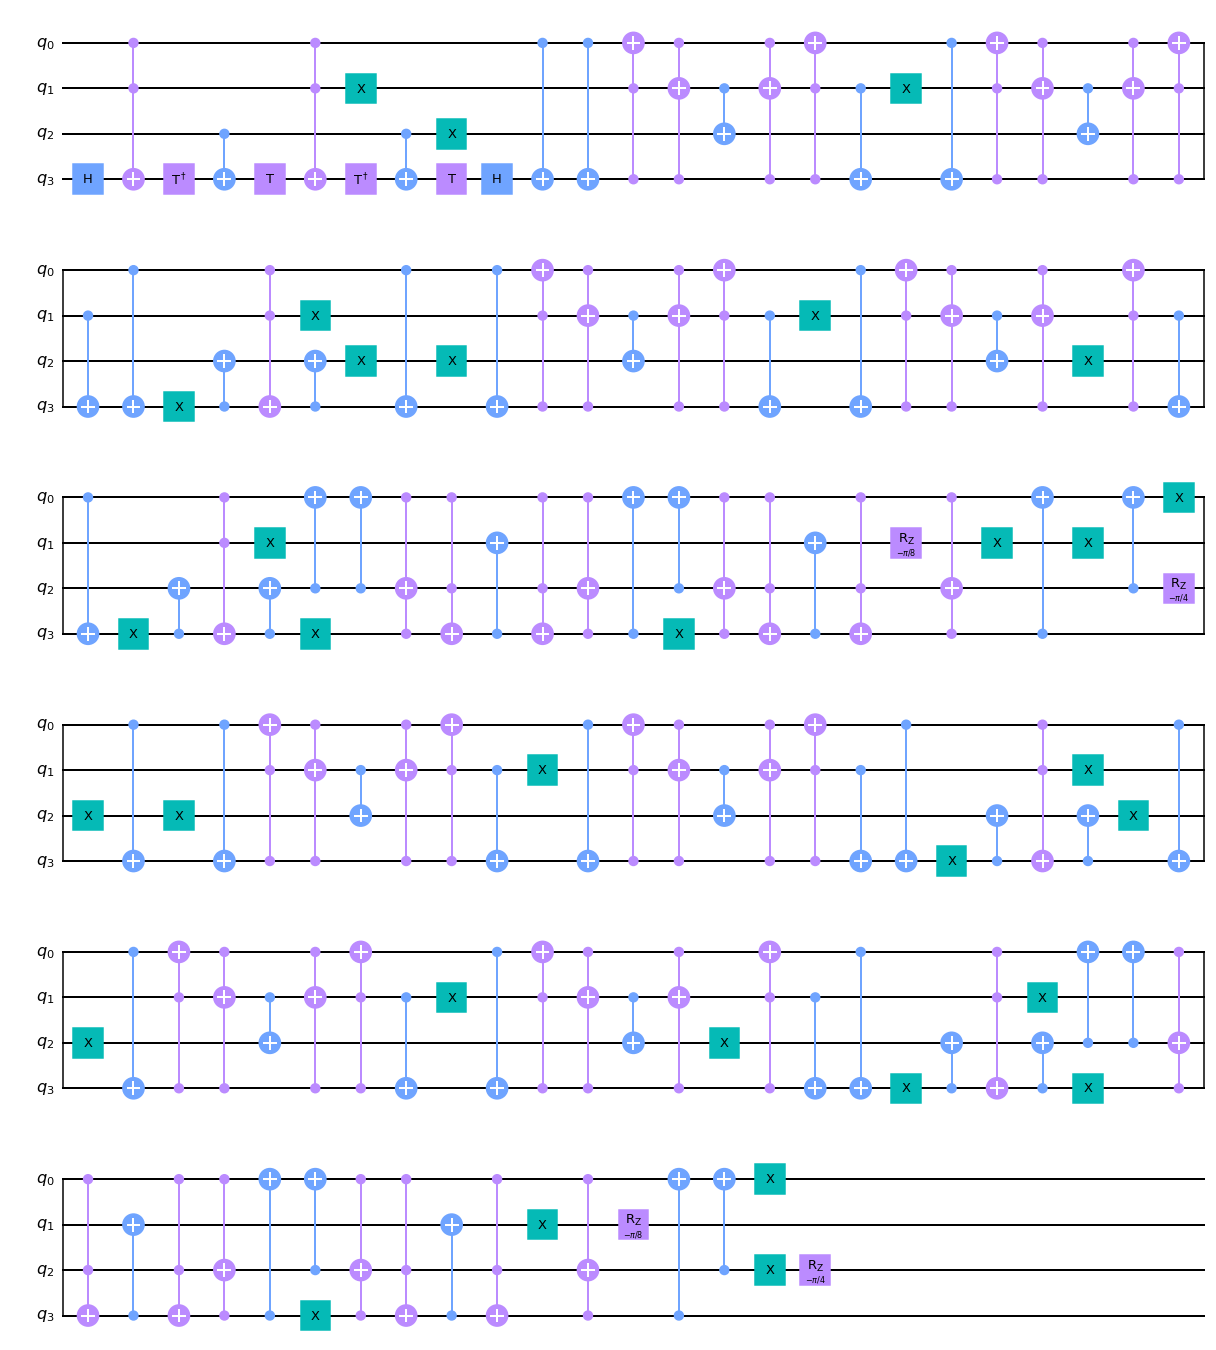

In [28]:
qc3.draw(output='mpl')

In [29]:
pm_orign = level_3_pass_manager(pass_manager_config)
qc_orign3 = pm_orign.run(qc3)

layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 3 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 3 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli a

In [30]:
pm_context = level_3_context_pass_manager(pass_manager_config)
qc_context3 = pm_context.run(qc3)

layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 0) Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 3)
calculated tags ['00', '01', 'f', 's'] ['01', '00', 'f', 'p']
initialized variant_tag: ('00', '01', 'f', 's')
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
initialized variant_tag: ('01', '00', 'f', 'p')
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True True
three qargs Qubit(Quan

look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', 

In [31]:

pm_context_pulse = level_3_context_pulse_pass_manager(pass_manager_config)
qc_context_pulse3 = pm_context_pulse.run(qc3)

layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 0) Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 3)
calculated tags ['00', '01', 'f', 's'] ['01', '00', 'f', 'p']
initialized variant_tag: ('00', '01', 'f', 's')
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
initialized variant_tag: ('01', '00', 'f', 'p')
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True True
three qargs Qubit(Quan

look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', 

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/sympy/core/expr.py:3951: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  deprecated_since_version="1.9").warn()


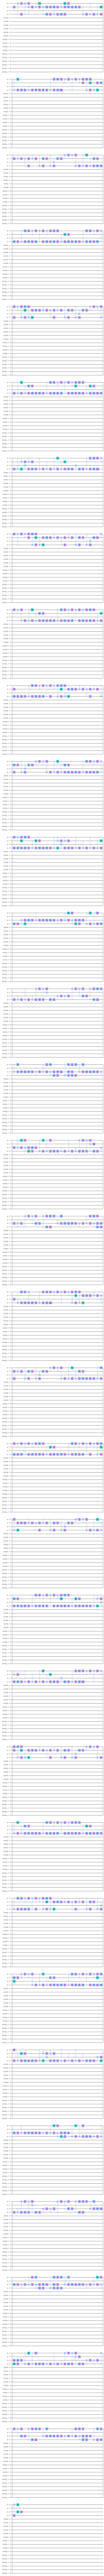

In [32]:
qc_context3.draw(output='mpl')

In [33]:
for index in range(0, len(result_lists)):
    print("qc", index)
    for i in result_lists[index]:
        print(i.count_ops())

qc 0
OrderedDict([('rz', 120), ('cx', 96), ('sx', 18)])
OrderedDict([('rz', 289), ('sx', 189), ('acecr_pm', 96), ('x', 45)])
OrderedDict([('rz', 81), ('cx', 68), ('sx', 22), ('x', 2)])
OrderedDict([('rz', 173), ('sx', 130), ('acecr_pm', 68), ('x', 2)])
qc 1
OrderedDict([('cx', 300), ('rz', 281), ('sx', 56), ('x', 2)])
OrderedDict([('rz', 844), ('sx', 537), ('acecr_pm', 300), ('x', 159)])
OrderedDict([('rz', 294), ('cx', 272), ('sx', 97), ('x', 9)])
OrderedDict([('rz', 697), ('sx', 463), ('acecr_pm', 272), ('x', 50)])
qc 2
OrderedDict([('rz', 167), ('cx', 158), ('sx', 42), ('x', 2)])
OrderedDict([('rz', 423), ('sx', 246), ('acecr_pm', 158), ('x', 97)])
OrderedDict([('rz', 180), ('cx', 146), ('sx', 67), ('x', 2)])
OrderedDict([('rz', 381), ('sx', 242), ('acecr_pm', 146), ('x', 32)])
qc 3
OrderedDict([('rz', 525), ('cx', 316), ('sx', 184), ('x', 84)])
OrderedDict([('rz', 1074), ('sx', 753), ('acecr_pm', 316), ('x', 61)])
OrderedDict([('rz', 564), ('cx', 314), ('sx', 236), ('x', 66)])
Orde

In [34]:
qc2 = generate_cnx_halfdirty(19)
qc2.count_ops()

OrderedDict([('ccx', 32)])

In [35]:
result_lists = generate_results(qc2, pass_manager_config)

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  call limit reached
Layout({
14: Qubit(QuantumRegister(19, 'q'), 0),
13: Qubit(QuantumRegister(19, 'q'), 1),
12: Qubit(QuantumRegister(19, 'q'), 2),
11: Qubit(QuantumRegister(19, 'q'), 3),
9: Qubit(QuantumRegister(19, 'q'), 4),
8: Qubit(QuantumRegister(19, 'q'), 5),
7: Qubit(QuantumRegister(19, 'q'), 6),
6: Qubit(QuantumRegister(19, 'q'), 7),
4: Qubit(QuantumRegister(19, 'q'), 8),
3: Qubit(QuantumRegister(19, 'q'), 9),
2: Qubit(QuantumRegister(19, 'q'), 10),
1: Qubit(QuantumRegister(19, 'q'), 11),
10: Qubit(QuantumRegister(19, 'q'), 12),
5: Qubit(QuantumRegister(19, 'q'), 13),
0: Qubit(QuantumRegister(19, 'q'), 14),
15: Qubit(QuantumRegister(19, 'q'), 15),
17: Qubi

('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  call limit reached
Layout({
14: Qubit(QuantumRegister(19, 'q'), 0),
13: Qubit(QuantumRegister(19, 'q'), 1),
12: Qubit(QuantumRegister(19, 'q'), 2),
11: Qubit(QuantumRegister(19, 'q'), 3),
9: Qubit(QuantumRegister(19, 'q'), 4),
8: Qubit(QuantumRegister(19, 'q'), 5),
7: Qubit(QuantumRegister(19, 'q'), 6),
6: Qubit(QuantumRegister(19, 'q'), 7),
4: Qubit(QuantumRegister(19, 'q'), 8),
3: Qubit(QuantumRegister(19, 'q'), 9),
2: Qubit(QuantumRegister(19, 'q'), 10),
1: Qubit(QuantumRegister(19, 'q'), 11),
10: Qubit(QuantumRegister(19, 'q'), 12),
5: Qubit(QuantumRegister(19, 'q'), 13),
0: Qubit(QuantumRegister(19, 'q'), 14),
15: Qubit(QuantumRegister(19, 'q'), 15),
17: Qubit(QuantumRegister(19, 'q'), 16),
16: Qubit(QuantumRegister(19, 'q'), 17),
18: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  0 3 2
The required to

intersect [Qubit(QuantumRegister(20, 'q'), 6), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 6)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 9)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 18), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 18), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 15)]
intersect [Qubit(QuantumRegister(20, 'q'), 0)]
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3)]
intersect [Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 16), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'f')
('11', '00', 'b')
interse

In [36]:
for i in result_lists:
    print(i.count_ops())

OrderedDict([('cx', 300), ('rz', 281), ('sx', 56), ('x', 2)])
OrderedDict([('rz', 844), ('sx', 537), ('acecr_pm', 300), ('x', 159)])
OrderedDict([('rz', 293), ('cx', 272), ('sx', 97), ('x', 9)])
OrderedDict([('rz', 696), ('sx', 461), ('acecr_pm', 272), ('x', 51)])


In [37]:
qc3 = generate_cnx_log_depth(19)
qc3.count_ops()

OrderedDict([('ccx', 17)])

In [38]:
result_lists3 = generate_results(qc3, pass_manager_config)

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  call limit reached
Layout({
14: Qubit(QuantumRegister(19, 'q'), 0),
13: Qubit(QuantumRegister(19, 'q'), 1),
12: Qubit(QuantumRegister(19, 'q'), 2),
11: Qubit(QuantumRegister(19, 'q'), 3),
9: Qubit(QuantumRegister(19, 'q'), 4),
8: Qubit(QuantumRegister(19, 'q'), 5),
7: Qubit(QuantumRegister(19, 'q'), 6),
6: Qubit(QuantumRegister(19, 'q'), 7),
4: Qubit(QuantumRegister(19, 'q'), 8),
3: Qubit(QuantumRegister(19, 'q'), 9),
2: Qubit(QuantumRegister(19, 'q'), 10),
1: Qubit(QuantumRegister(19, 'q'), 11),
10: Qubit(QuantumRegister(19, 'q'), 12),
5: Qubit(QuantumRegister(19, 'q'), 13),
0: Qubit(QuantumRegister(19, 'q'), 14),
15: Qubit(QuantumRegister(19, 'q'), 15),
17: Qubit(QuantumRegister(19, 'q'), 16),
16: Qubit(QuantumRegister(1

No solution found:  call limit reached
Layout({
14: Qubit(QuantumRegister(19, 'q'), 0),
13: Qubit(QuantumRegister(19, 'q'), 1),
12: Qubit(QuantumRegister(19, 'q'), 2),
11: Qubit(QuantumRegister(19, 'q'), 3),
9: Qubit(QuantumRegister(19, 'q'), 4),
8: Qubit(QuantumRegister(19, 'q'), 5),
7: Qubit(QuantumRegister(19, 'q'), 6),
6: Qubit(QuantumRegister(19, 'q'), 7),
4: Qubit(QuantumRegister(19, 'q'), 8),
3: Qubit(QuantumRegister(19, 'q'), 9),
2: Qubit(QuantumRegister(19, 'q'), 10),
1: Qubit(QuantumRegister(19, 'q'), 11),
10: Qubit(QuantumRegister(19, 'q'), 12),
5: Qubit(QuantumRegister(19, 'q'), 13),
0: Qubit(QuantumRegister(19, 'q'), 14),
15: Qubit(QuantumRegister(19, 'q'), 15),
17: Qubit(QuantumRegister(19, 'q'), 16),
16: Qubit(QuantumRegister(19, 'q'), 17),
18: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  7 6 5
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
three qargs Qubit(QuantumReg

intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Q

In [39]:
for i in result_lists3:
    print(i.count_ops())

OrderedDict([('rz', 167), ('cx', 158), ('sx', 42), ('x', 2)])
OrderedDict([('rz', 423), ('sx', 246), ('acecr_pm', 158), ('x', 97)])
OrderedDict([('rz', 180), ('cx', 146), ('sx', 67), ('x', 2)])
OrderedDict([('rz', 381), ('sx', 242), ('acecr_pm', 146), ('x', 32)])


In [40]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider
import cirq

In [41]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [42]:
orign_pulse_out = superstaq_provider.cq_compile(qc_orign_pulse, target="ibmq_montreal_qpu")

NameError: name 'qc_orign_pulse' is not defined

In [ ]:
context_pulse_out = superstaq_provider.cq_compile(qc_context_pulse, target="ibmq_montreal_qpu")